<a href="https://colab.research.google.com/github/gitudaniel/fastai-course-notes/blob/main/Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning is a way of creating programs such that they learn from their experience (training) and get better the more experience they have. The procedure incorporates automatic adjustments based on performance

A trained model can be used in a similar fashion to a program. There are inputs to a model after which it gives us the result. This is called **inference** (using a trained model as a program to do a task such as playing checkers)

The `universal approximation theorem` shows that `neural networks` in theory can solve any solveable problem to any level of accuracy if you just give it the right weights

`Stochastic Gradient Descent` is a general way to update the weights of a neural network to make it improve at any given task

Modern deep learning terminology:
   - The functional form of the `model` is called its `architecture`. But these are sometimes used interchangeably.
   - The `weights` are called `parameters`.
   - `Independent variables` are the `data` not including the `labels`.
   - The results of a model are the `predictions`
   - `Loss` is the measure of performance.
   - The loss depends not only on the predictions but also the correct `labels` (also known as `targets` or `dependent variables`)

Limitations inherent to deep learning:
   - A model cannot be created without data
   - A model can only learn to operate on the patterns seen in the data used to train it
   - This learning approach only creates predictions not recommendations
   - It is not enough to have examples of input data; we need labels for the data as well

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/grenouille/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.182397,0.022239,0.005413,6:06:37


epoch,train_loss,valid_loss,error_rate,time
0,0.057066,0.012538,0.004736,3:57:37


In [ ]:
from fastai.vision.all import *

/home/grenouille/anaconda3/envs/tf_env/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370120218/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
doc(ImageDataLoaders.from_name_func)

ImageDataLoaders.from_name_func(path, fnames, label_func, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, bs=64, val_bs=None, shuffle_train=True, device=None)
Create from the name attrs of `fnames` in `path`s with `label_func`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


The `untar_data()` function downloads a dataset, decompresses it and saves it to your computer. It returns the path to the decompressed data

The `URLs.PETS` is one of the datasets natively available to fastai

Fastai provides a `doc()` function to get the documentation of functions, e.g. to get the documentation of `from_name_func()` run:
```python
doc(ImageDataLoaders.from_name_func)
```

The `label_func` argument enables us to label the data. In this case it labels images as belonging to a cat or a dog based on logic conained in the `is_cat()` function

A learner `cnn_learner()` in this case trains the data, we pass it the data, the architecture to use and the metrics to print out as it's training

`valid_pct` gives us the *validation set* i.e. it takes a portion of the training data and uses it to measure the accuracy of the model. If `valid_pct=0.2` 20% percent of training data is excluded from trainig and used to calculate the error rate in training the data

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.734598,2.013547,00:31


epoch,train_loss,valid_loss,time
0,1.517570,1.407876,00:40
1,1.367824,1.272546,00:39
2,1.255560,1.082954,00:38
3,1.225415,1.494296,00:38
4,1.178032,1.017132,00:39
5,1.097313,0.949181,00:40
6,1.015826,0.920445,00:39
7,0.951365,0.913515,00:38


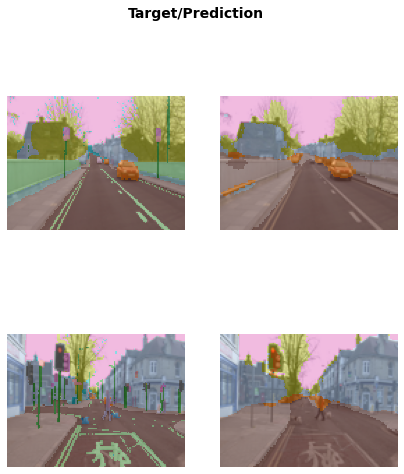

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

/home/grenouille/anaconda3/envs/tf_env/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370120218/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.predict('I really liked that movie!')

In [ ]:
# predicting salary data from CSV columns i.e. tabular data
from fastai.tabular.all import *
path = untar_data(URLS.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names='salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'])
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])
    
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
# collaborative filtering
# predict for each combination of a user and movie what rating the user will give to a movie
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

- A classification model predicts belonging i.e is it a dog or a cat.

- A regression model predicts a numeric quantity e.g. price, temperature, age etc.

- `Overfitting` - Training a model such that it remembers specific features of the training data and does not generalize well to data not seen during training.

- When overfitting occurs, the accuracy of the model actually starts to get worse.

- `valid_pct` creates a validation set from our training data to ensure that we're not overfitting.

- `Architecture` - The mathematical function that we're optimizing.

- The `learner` contains our dataset, the architecture and the metrics.

- `Metric` measures the quality of a model's prediction using the validation set. Common metrics include `error_rate` and `accuracy` (1 - error_rate).

- `Epoch` - A single run on every single item in the dataset

- `Test set` - A set of data set aside to measure performance of a model after training.

- `Transfer learning` - Using a pretrained model for a task different to what it was originally trained for.

- `Fine tuning` - A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining. Using an object classifier to identify different types of food.

- `Model` - Combination of architecture with a particular set of parameters.

- `Parameters` - Values in the model that dictate what task it can do. Are updated via model training.

- `Hyper-parameters` - Actual numbers passed to a fitting function to decide how the fitting process happens.

- `Loss` - A measure of how good a model is, chosen to train a model via SGD (Stochastic Gradient Descent)

- Convolutional Neural Networks (CNNs) are particulary good at computer vision tasks.

- `Label` - The data we're trying to predict e.g. "dog" or "cat".

- `Catastrophic forgetting` - A pretrainied imagenet model trained to identify cats and dogs will be less able to identify objects the better it is able to identify cats and dogs. To train a model that is good at both the new and the previous task the fine tuning data should also include examples of the previous tasks.